# Model Evaluaton and Deployment

## Table of Contents
1. [Import Libraries](#import-libraries)
2. [Import Data and Model](#import-data-and-model)
3. [Evaluate the Model on Test Set](#evaluate-model)
4. [Prediction Function for New Data](#prediction-function)

## 1. Import Libraries <a id="import-libraries"></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib

## 2. Import Data and Model <a id="import-data-and-model"></a>

In [13]:
# Processed Data
X_test = pd.read_csv('../../data/processed/X_test_scaled.csv')
y_test = pd.read_csv('../../data/processed/y_test.csv').values.ravel()

# Load model
model = joblib.load('../../models/best_model.pkl')

## 3. Evaluate the Model on Test Set <a id="evaluate-model"></a>

Accuracy: 0.8117, F1-score: 0.7766
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       100
           1       0.82      0.59      0.69        54

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154



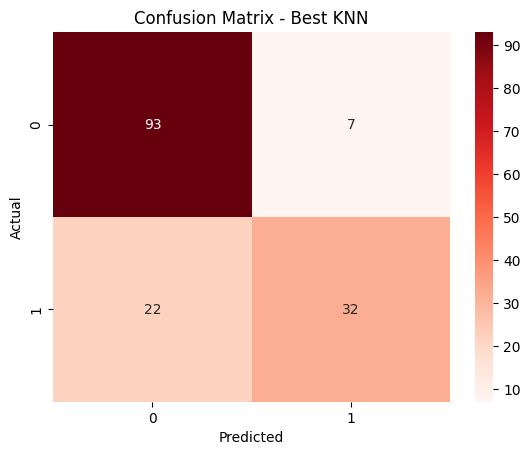

In [14]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Accuracy: {acc:.4f}, F1-score: {f1:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
# plt.savefig('../../outputs/charts/nb1_confusion_matrix_best_knn.png', bbox_inches='tight')
plt.show()

## 4. Prediction Function for New Data <a id="prediction-function"></a>

In [10]:
def predict_diabetes(input_data, model_path='../../models/best_model.pkl'):
    """
    input_data: array-like, shape (n_samples, n_features)
    model_path: path of saved model
    """
    model = joblib.load(model_path)
    prediction = model.predict(input_data)
    return prediction

# Ví dụ sử dụng:
# new_data = X_test.iloc[:5, :]
# print(predict_diabetes(new_data))